# Object Recognition

Mwenya Sikazwe

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import skimage.feature
from skimage.feature import hog

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [8]:
trn_images = np.load('trnImage.npy')
tst_images = np.load('tstImage.npy')

#ravel to convert to 1-D array for the models.
trn_labels = np.load('trnLabel.npy').ravel()
tst_labels = np.load('tstLabel.npy').ravel()

#print shapes to verify the datasets.
print("Training images shape:", trn_images.shape)
print("Testing images shape:",tst_images.shape)
print("Training labels shape:",trn_labels.shape)
print("Testing labels shape:",tst_labels.shape)

Training images shape: (32, 32, 3, 10000)
Testing images shape: (32, 32, 3, 1000)
Training labels shape: (10000,)
Testing labels shape: (1000,)


SVM Model

In [9]:
def extract_hog_features(images):

    hog_features = []

    #HOG feature extraction
    for i in range(images.shape[3]):
        # convert the images to grayscale
        img = images[:, :, :, i]
        gray_img = np.dot(img[...,:3], [0.299, 0.587, 0.114])

        fd = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(fd)

    return np.array(hog_features)

In [10]:
trn_images_hog = extract_hog_features(trn_images)
tst_images_hog = extract_hog_features(tst_images)

#normalise the data for better accuracy
normaliser = StandardScaler()
trn_images_nd = normaliser.fit_transform(trn_images_hog)
tst_images_nd = normaliser.transform(tst_images_hog)


model = SVC(kernel='rbf', random_state=42)
model.fit(trn_images_nd, trn_labels)

prediction = model.predict(tst_images_nd)
accuracy = accuracy_score(tst_labels, prediction)
print(f"Accuracy = {accuracy * 100:.2f}%")

Accuracy = 56.00%


SVM Classifcation report

In [11]:
print(classification_report(tst_labels, prediction))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63       100
           1       0.64      0.59      0.61       100
           2       0.45      0.47      0.46       100
           3       0.42      0.37      0.39       100
           4       0.45      0.59      0.51       100
           5       0.47      0.51      0.49       100
           6       0.62      0.58      0.60       100
           7       0.66      0.57      0.61       100
           8       0.65      0.67      0.66       100
           9       0.70      0.59      0.64       100

    accuracy                           0.56      1000
   macro avg       0.57      0.56      0.56      1000
weighted avg       0.57      0.56      0.56      1000



SVM Confusion Matrix

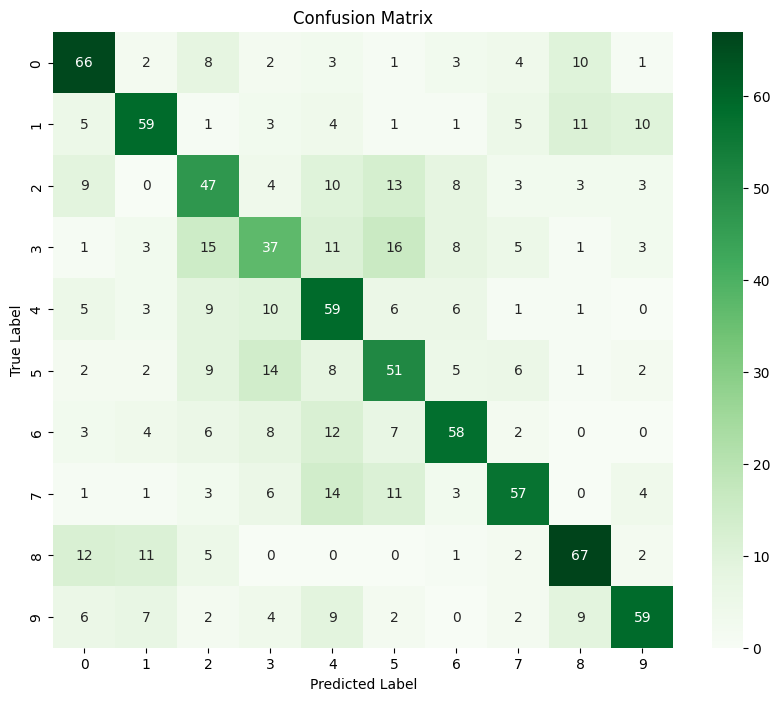

In [28]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(tst_labels, prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

CNN Model

In [14]:
X_trn = trn_images.transpose(3, 0, 1, 2) / 255.0
X_tst = tst_images.transpose(3, 0, 1, 2) / 255.0


model = tf.keras.Sequential([

    #Convolutional Layers
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),

    #Flatten
    tf.keras.layers.Flatten(),

    #Connected Layers
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


history = model.fit(
    X_trn, trn_labels,
    epochs=25,
    validation_split=0.2,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_tst, tst_labels, verbose=0)
print(f"Accuracy = {test_accuracy * 100:.2f}%")

Epoch 1/25
250/250 [==============================] - 49s 188ms/step - loss: 2.1435 - accuracy: 0.3318 - val_loss: 3.6712 - val_accuracy: 0.0000e+00
Epoch 2/25
250/250 [==============================] - 45s 179ms/step - loss: 1.5793 - accuracy: 0.4545 - val_loss: 4.1364 - val_accuracy: 0.0000e+00
Epoch 3/25
250/250 [==============================] - 44s 176ms/step - loss: 1.3582 - accuracy: 0.5117 - val_loss: 6.2846 - val_accuracy: 0.0000e+00
Epoch 4/25
250/250 [==============================] - 43s 174ms/step - loss: 1.2570 - accuracy: 0.5452 - val_loss: 6.2020 - val_accuracy: 0.0000e+00
Epoch 5/25
250/250 [==============================] - 44s 174ms/step - loss: 1.1603 - accuracy: 0.5909 - val_loss: 6.2270 - val_accuracy: 0.0000e+00
Epoch 6/25
250/250 [==============================] - 43s 174ms/step - loss: 1.0483 - accuracy: 0.6242 - val_loss: 6.9579 - val_accuracy: 0.0000e+00
Epoch 7/25
250/250 [==============================] - 43s 174ms/step - loss: 0.9537 - accuracy: 0.6603 - v

CNN classifcation report

In [15]:
label_pred = model.predict(X_tst)
label_pred_classes = np.argmax(label_pred, axis=1)

print("Classification Report:")
print(classification_report(tst_labels, label_pred_classes))

32/32 [==============================] - 1s 36ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.78      0.46       100
           1       0.67      0.44      0.53       100
           2       0.47      0.36      0.41       100
           3       0.26      0.51      0.35       100
           4       0.58      0.14      0.23       100
           5       0.22      0.64      0.32       100
           6       1.00      0.05      0.10       100
           7       0.50      0.51      0.50       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100

    accuracy                           0.34      1000
   macro avg       0.40      0.34      0.29      1000
weighted avg       0.40      0.34      0.29      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CNN Confusion Matrix

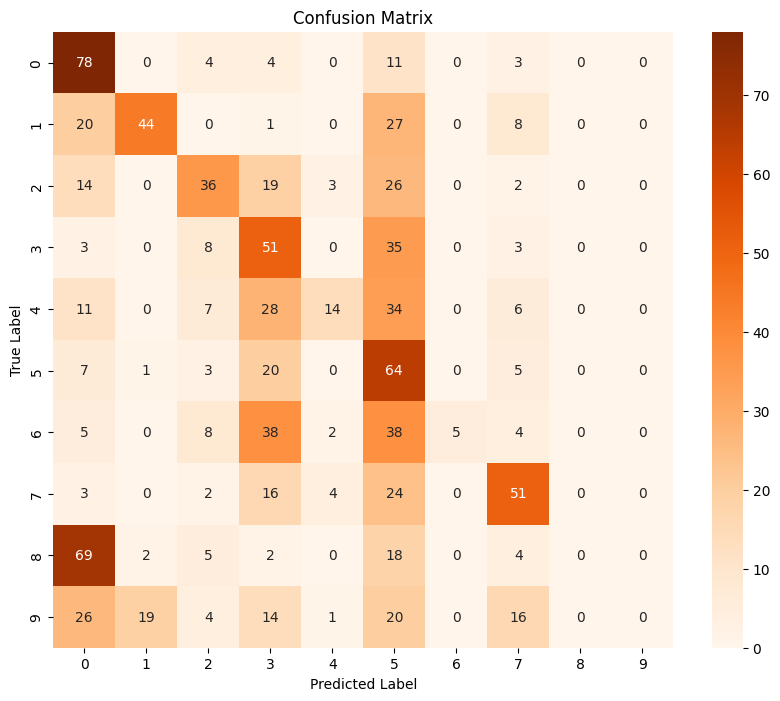

In [35]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(tst_labels, label_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()